### THIAW Mouhamadou Lamine Bara


### Modeles Stochastiques en Finance MAP 552


#           Computer Problem Set 1.3
#                        Stochastic Integration

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [13]:
T=2

Q1/

In [14]:
M=1000
def compute(n):
    deltaT=T/n
    samples_I=[]
    samples_J=[]
    samples_K=[]
    for i in range(M):
         
         W=np.cumsum(np.sqrt(deltaT)*np.random.randn(n+1))
         deltaW=np.diff(W)
         a=0.5*(W[-1]**2)-np.sum(W[:-1]*deltaW)
         b=0.5*(W[-1]**2)-np.sum(W[1:]*deltaW)
         c=0.5*(W[-1]**2)-0.5*np.sum((W[1:]+W[:-1])*deltaW)
         samples_I.append(a)
         samples_J.append(b)
         samples_K.append(c)
    return(samples_I,samples_J,samples_K)     


In [15]:
samples_I,samples_J,samples_K=compute(1000)

In [16]:
moyenne_In = np.mean(samples_I)
moyenne_Jn = np.mean(samples_J)
moyenne_Kn = np.mean(samples_K)

print(f"Mean of (1/2)W^2T - In: {moyenne_In}")
print(f"Mean of (1/2)W^2T - Jn: {moyenne_Jn}")
print(f"Mean of (1/2)W^2T - Kn: {moyenne_Kn}")


Mean of (1/2)W^2T - In: 1.0022575739415738
Mean of (1/2)W^2T - Jn: -1.00036604009177
Mean of (1/2)W^2T - Kn: 0.0009457669249019043


In [17]:
n_values=np.arange(10,21)

(C) Vary the value of n from 10 to 20, and provide a graph of the resulting
sample means, together with the corresponding confidence intervals

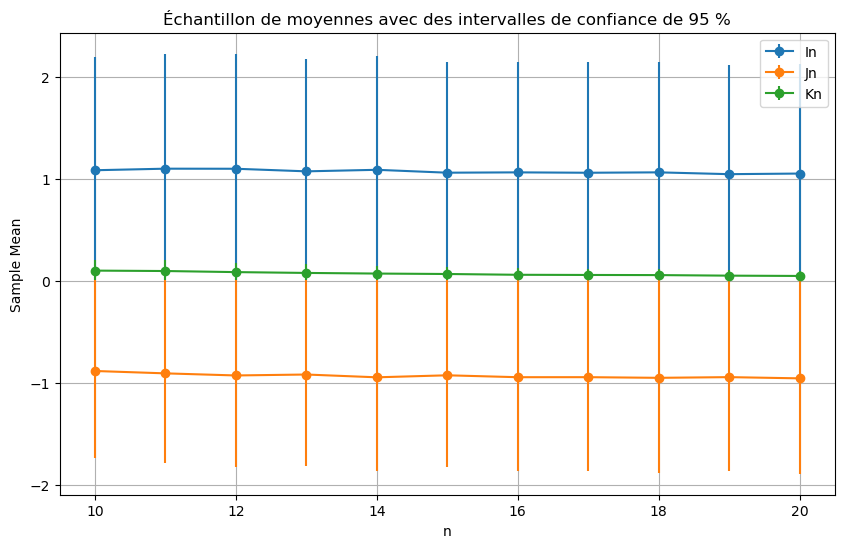

In [18]:
results = {"n": [], "moyenne_I": [], "moyenne_J": [], "moyenne_K": [], "confiance_intervalle_I": [], "confiance_intervalle_J": [], "confiance_intervalle_K": []}

for n in n_values:
    samples_I, samples_J, samples_K = compute(n) # Appel de la fonction pour le calcul
    moyenne_I = np.mean(samples_I)
    moyenne_J = np.mean(samples_J)
    moyenne_K = np.mean(samples_K)
    stderr_I = stats.sem(samples_I)
    stderr_J = stats.sem(samples_J)
    stderr_K = stats.sem(samples_K)
    delta_I = stderr_I * stats.t.ppf((1 + 0.95) / 2, M - 1)
    delta_J = stderr_J * stats.t.ppf((1 + 0.95) / 2, M - 1)
    delta_K = stderr_K * stats.t.ppf((1 + 0.95) / 2, M - 1)
    confiance_intervalle_I = (moyenne_I - delta_I, moyenne_I + delta_I)
    confiance_intervalle_J = (moyenne_J - delta_J, moyenne_J + delta_J)
    confiance_intervalle_K = (moyenne_K - delta_K, moyenne_K + delta_K)
    
    results["n"].append(n)
    results["moyenne_I"].append(moyenne_I)
    results["moyenne_J"].append(moyenne_J)
    results["moyenne_K"].append(moyenne_K)
    results["confiance_intervalle_I"].append(confiance_intervalle_I)
    results["confiance_intervalle_J"].append(confiance_intervalle_J)
    results["confiance_intervalle_K"].append(confiance_intervalle_K)

plt.figure(figsize=(10, 6))
plt.errorbar(results["n"], results["moyenne_I"], yerr=np.array(results["confiance_intervalle_I"]).T, label="In", marker='o')
plt.errorbar(results["n"], results["moyenne_J"], yerr=np.array(results["confiance_intervalle_J"]).T, label="Jn", marker='o')
plt.errorbar(results["n"], results["moyenne_K"], yerr=np.array(results["confiance_intervalle_K"]).T, label="Kn", marker='o')
plt.xlabel("n")
plt.ylabel("Sample Mean")
plt.legend()
plt.title("Échantillon de moyennes avec des intervalles de confiance de 95 %")
plt.grid(True)
plt.show()

(b) On refait la meme chose avec $A_n ,B_n, et ,C_n$

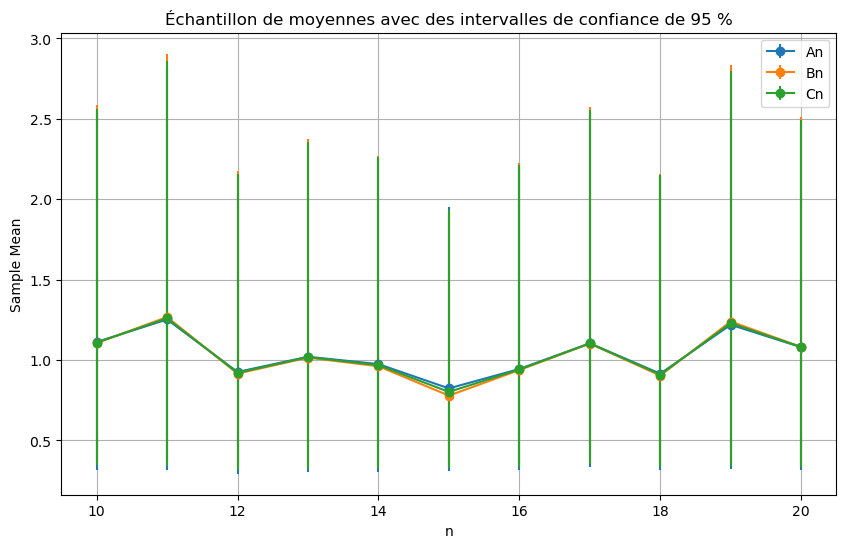

In [19]:


def compute_new_variables(n):
    deltaT = T / n
    bornes=np.linspace(0,T,n+1)
    samples_An = []
    samples_Bn = []
    samples_Cn = []
    
    for i in range(M):
        W = np.cumsum(np.sqrt(deltaT) * np.random.randn(n + 1)) #brownien
        deltaW = np.diff(W)
        etn =np.exp(bornes)
        semi_bornes=[borne/2 for borne in bornes]
        semi_etn=np.exp(semi_bornes)
        An = np.sum(etn[:-1] * deltaW)
        Bn = np.sum(etn[1:] * deltaW)
        Cn = np.sum(deltaW*semi_etn[1:]*semi_etn[:-1])
        a=0.5*(W[-1]**2)-An
        b=0.5*(W[-1]**2)-Bn
        c=0.5*(W[-1]**2)-Cn
        
        samples_An.append(a)
        samples_Bn.append(b)
        samples_Cn.append(c)
    
    return samples_An, samples_Bn, samples_Cn


results_new = {"n": [], "moyenne_An": [], "moyenne_Bn": [], "moyenne_Cn": [], "confiance_intervalle_An": [], "confiance_intervalle_Bn": [], "confiance_intervalle_Cn": []}

for n in n_values:
    samples_An, samples_Bn, samples_Cn = compute_new_variables(n)
    moyenne_An = np.mean(samples_An)
    moyenne_Bn = np.mean(samples_Bn)
    moyenne_Cn = np.mean(samples_Cn)
    stderr_An = stats.sem(samples_An)
    stderr_Bn = stats.sem(samples_Bn)
    stderr_Cn = stats.sem(samples_Cn)
    
    delta_An = stderr_An * stats.t.ppf((1 + 0.95) / 2, M - 1)
    delta_Bn = stderr_Bn * stats.t.ppf((1 + 0.95) / 2, M - 1)
    delta_Cn = stderr_Cn * stats.t.ppf((1 + 0.95) / 2, M - 1)
    
    confiance_intervalle_An = (moyenne_An - delta_An, moyenne_An + delta_An)
    confiance_intervalle_Bn = (moyenne_Bn - delta_Bn, moyenne_Bn + delta_Bn)
    confiance_intervalle_Cn = (moyenne_Cn - delta_Cn, moyenne_Cn + delta_Cn)
    
    results_new["n"].append(n)
    results_new["moyenne_An"].append(moyenne_An)
    results_new["moyenne_Bn"].append(moyenne_Bn)
    results_new["moyenne_Cn"].append(moyenne_Cn)
    results_new["confiance_intervalle_An"].append(confiance_intervalle_An)
    results_new["confiance_intervalle_Bn"].append(confiance_intervalle_Bn)
    results_new["confiance_intervalle_Cn"].append(confiance_intervalle_Cn)

# Créez le graphique pour les nouvelles variables
plt.figure(figsize=(10, 6))
plt.errorbar(results_new["n"], results_new["moyenne_An"], yerr=np.array(results_new["confiance_intervalle_An"]).T, label="An", marker='o')
plt.errorbar(results_new["n"], results_new["moyenne_Bn"], yerr=np.array(results_new["confiance_intervalle_Bn"]).T, label="Bn", marker='o')
plt.errorbar(results_new["n"], results_new["moyenne_Cn"], yerr=np.array(results_new["confiance_intervalle_Cn"]).T, label="Cn", marker='o')
plt.xlabel("n")
plt.ylabel("Sample Mean")
plt.legend()
plt.title("Échantillon de moyennes avec des intervalles de confiance de 95 %")
plt.grid(True)
plt.show()


(3) We have to compute $A_n = \sin(W_T) + \frac{1}{2n} \sum_{i=1}^{n} \sin(W_{t_{i-1}^n})
$

In [20]:
n_values=np.arange(10,201)
M=1000

In [21]:
def compute_An(n):
    deltaT = T/n
    samples_An=[]

    for i in range(M):
        W = np.cumsum(np.sqrt(deltaT)*np.random.randn(n+1)) #Mouvement brownien 
        An = np.sin(W[-1]) + (1/(2*n)) * np.sum(np.sin(W[:-1]))
        samples_An.append(An)

    return samples_An

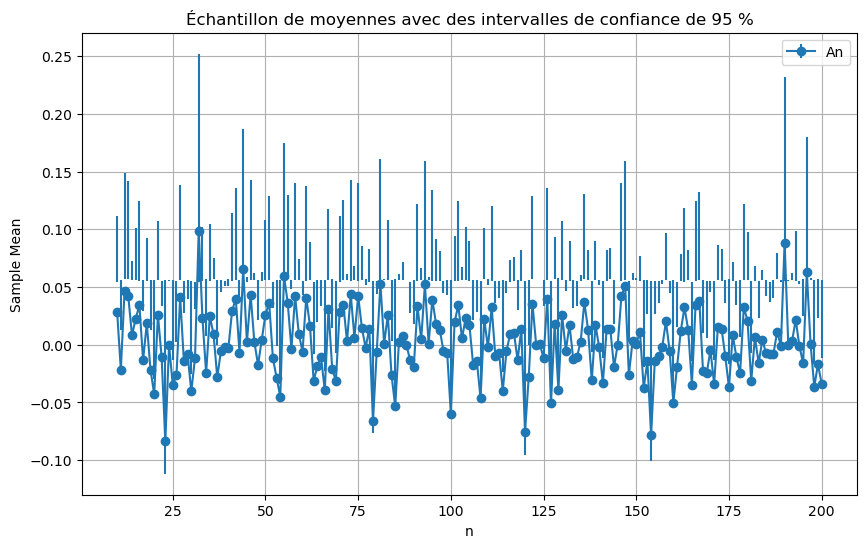

In [22]:
results_An={"n": [], "moyenne_An": [], "confiance_intervalle_An": []}

for n in n_values:
    samples_An = compute_An(n)
    moyenne_An = np.mean(samples_An)
    stderr_An = stats.sem(samples_An)
    delta_An = stderr_An * stats.t.ppf((1 + 0.95)/2,M - 1)
    confiance_intervalle_An = (moyenne_An - delta_An, moyenne_An + delta_An)
    results_An["n"].append(n)
    results_An["moyenne_An"].append(moyenne_An)
    results_An["confiance_intervalle_An"].append(confiance_intervalle_An)


plt.figure(figsize=(10, 6))
plt.errorbar(results_An["n"], results_An["moyenne_An"], yerr=np.array(results_An["confiance_intervalle_An"]).T, label="An", marker='o')
plt.xlabel("n")
plt.ylabel("Sample Mean")
plt.legend()
plt.title("Échantillon de moyennes avec des intervalles de confiance de 95 %")
plt.grid(True)
plt.show()

In this case, We were trying to approximate the following integral:
$$
    I = \int_0^T \sin(W_s)\,\mathrm{d}s
$$

We can see by the graph that this value oscillates around 0. \
\
This thing is normal due to the following fact:
$$
    \mathbb E[I] = 0.
$$

We can use Fubini and then we will have
$$\mathbb E[I]= \mathbb E[\int_0^T \mathbb \sin W_s\,\mathrm ds]\\
              = \int_0^T \mathbb E[\sin W_s]\,\mathrm ds
$$


But, We know that $$
    \mathbb E[\sin W_s] = \Im \mathbb E[e^{iW_s}] = \Im \mathbb E[e^{i\sqrt s G}] = \Im(e^{-\frac12 s}) = 0$$


where G follows the distribution law $G\sim \mathcal N(0,1)$ 

Then $$\mathbb E[I]=0$$

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------